# Ridge Regression & Lasso Regression

* Linear Regression is used to find out best fit line based on the dataset, for example predict the salary based on the experience.
* Training the model with train data set and find out the best fit line with the help of Linear Regression.
* With the training data all the points are passing through best fit line means Cost function is "Zero"(Less bias).
* But when we are passing test data set to trained model, sum of residuals will be high because testing data points are not passing through best fit line means high variance.
* If bias is less and variance is high means this leads to overfitting problem.
* We need to create a generalize model with less bias and less variance.
* We can use Ridge & Lasso regression to overcome this problem.

Note : Lambda value should be greater than zero to any positive number.
    
* In case of Training data sum of residuals is "0" means slope is very high steep.
* We need to find new best fit line(less steep) by using Ridge & Lasso regression(multiplying lambda with Slop),sum of residuals is very less and slope will be less steep.
* Lasso regression not only overcome overfitting problem, it also to do feature selection.
* When we are appliying(slope^2) in ridge regression.slope will move to zero but not exactly zero.but in case of Lesso regression it moves to zero.
* With magnitude slop at certain point slop will be moved to zero means some of the features values becomes Zero, those features will be removed automatically because this fetures are not importand to predict.



# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading boston(House price prediction) dataset which is present in sklearn library

In [4]:
from sklearn.datasets import load_boston

# Storing boston dataset in df variable

In [5]:
df=load_boston()

In [6]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

# convert the dataset to dataframe format

In [9]:
dataset=pd.DataFrame(df.data)

# Retrieving top 5 rows

In [11]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Assiging feature names to dataset

In [12]:
dataset.columns=df.feature_names

In [13]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
dataset.shape

(506, 13)

In [16]:
df.target.shape

(506,)

Adding dependent data to the orignal data set

In [17]:
dataset["Price"]=df.target

In [18]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1:]

In [26]:
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# Linear Regression

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [50]:
model=LinearRegression()
mse=cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=5)
mean_mse=np.mean(mse)

In [51]:
print(mean_mse)

-37.13180746769922


# Ridge Regression

Since we are using "neg_mean_squared_error" value is giving negative.
if the value is more nearest to zero means model is more accurate

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regression=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)
ridge_regression.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [53]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 100}
-29.87194511543252


Compare to Linear Regression, ridge regression value is less and it is nearest to zero.
best_params_ helps to find out which lambda value is suitable.


# Lasso Regression

In [54]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regression=GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=5)
lasso_regression.fit(x,y)

D:\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [55]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 1}
-35.491283263627096


compare to Linear regression, Lasso regression value is less.

Lasso regression does that some of the features will completely ignore (feature reduction).
it is just to minimize the minimum squared error.

lambda multiplied by magnitude of slope, because of this particular value is more generalized.
Ridge is better than Lasso,Lasso performed well when we have more number of features.


In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [63]:
prediction_ridge=ridge_regression.predict(x_test)
prediction_lesso=lasso_regression.predict(x_test)

In [ ]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

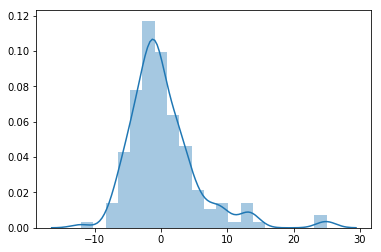

In [59]:
import seaborn as sns
sns.distplot(y_test-prediction_ridge)